In [507]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction  import DictVectorizer
from sklearn.linear_model import LogisticRegression

# Data Preparation

In [508]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [509]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [510]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [511]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [512]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [513]:
tc =  pd.to_numeric(df.totalcharges, errors = 'coerce')

In [514]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [515]:
df.totalcharges =  pd.to_numeric(df.totalcharges, errors = 'coerce')

In [516]:
df.totalcharges = df.totalcharges.fillna(df.totalcharges.median())

In [517]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [518]:
df.churn = (df.churn == 'yes').astype(int)

In [519]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

# Setting up the validation framework

In [520]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

In [521]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

In [522]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [523]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [524]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [525]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# EDA

In [526]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4223-bkeor,female,0,no,yes,21,yes,no,dsl,yes,...,yes,no,no,yes,one_year,no,mailed_check,64.85,1336.800,0
1,6035-riiom,female,0,no,no,54,yes,yes,fiber_optic,no,...,no,no,yes,yes,two_year,yes,bank_transfer_(automatic),97.20,5129.450,0
2,3797-vtidr,male,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,23.45,23.450,1
3,2568-brgyx,male,0,no,no,4,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.20,237.950,1
4,2775-sefee,male,0,no,yes,0,yes,yes,dsl,yes,...,no,yes,no,no,two_year,yes,bank_transfer_(automatic),61.90,1397.475,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0684-aosih,male,0,yes,no,1,yes,no,fiber_optic,yes,...,no,no,yes,yes,month-to-month,yes,electronic_check,95.00,95.000,1
5630,5982-psmkw,female,0,yes,yes,23,yes,yes,dsl,yes,...,yes,yes,yes,yes,two_year,yes,credit_card_(automatic),91.10,2198.300,0
5631,8044-bgwpi,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,yes,electronic_check,21.15,306.050,0
5632,7450-nwrtr,male,1,no,no,12,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,99.45,1200.150,1


In [527]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [528]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [529]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [530]:
numerical = ['tenure', 'monthlycharges', 'totalcharges'] 

In [531]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [532]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
    'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [533]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Feature Importance

## Churn rate

In [534]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4223-bkeor,female,0,no,yes,21,yes,no,dsl,yes,...,yes,no,no,yes,one_year,no,mailed_check,64.85,1336.800,0
1,6035-riiom,female,0,no,no,54,yes,yes,fiber_optic,no,...,no,no,yes,yes,two_year,yes,bank_transfer_(automatic),97.20,5129.450,0
2,3797-vtidr,male,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,23.45,23.450,1
3,2568-brgyx,male,0,no,no,4,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.20,237.950,1
4,2775-sefee,male,0,no,yes,0,yes,yes,dsl,yes,...,no,yes,no,no,two_year,yes,bank_transfer_(automatic),61.90,1397.475,0


In [636]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [535]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.2708409173643975

In [536]:
global_churn_rate - churn_female

-0.005310210939122428

In [537]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.26047800484932454

In [538]:
global_churn_rate - churn_male

0.005052701575950558

In [539]:
global_churn_rate = df_full_train.churn.mean()
global_churn_rate

0.2655307064252751

In [540]:
df_full_train.partner.value_counts()

partner
no     2904
yes    2730
Name: count, dtype: int64

In [541]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20073260073260074

In [542]:
global_churn_rate - churn_partner

0.06479810569267436

In [543]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.32644628099173556

In [544]:
global_churn_rate - churn_no_partner

-0.06091557456646046

1. global - group
   
if <0 --> more likely to churn

if >0 --> less likely to churn

## Risk ratio

2. Risk = group / global

if >1 --> more likely to churn

if <1 --> less likely to churn

In [545]:
churn_no_partner / global_churn_rate

1.2294106598311754

In [546]:
churn_partner / global_churn_rate

0.7559675618499149

In [547]:
from IPython.display import display

In [548]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)

gender


,mean,count,diff,risk
gender,,,,
female,0.270841,2747,0.005310,1.019998
male,0.260478,2887,-0.005053,0.980971


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.237098,4728,-0.028433,0.892922
1,0.413907,906,0.148377,1.558793


partner


,mean,count,diff,risk
partner,,,,
no,0.326446,2904,0.060916,1.229411
yes,0.200733,2730,-0.064798,0.755968


dependents


,mean,count,diff,risk
dependents,,,,
no,0.312326,3951,0.046795,1.176233
yes,0.155674,1683,-0.109856,0.586276


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.253623,552,-0.011908,0.955156
yes,0.266824,5082,0.001293,1.004871


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.251397,2685,-0.014134,0.946771
no_phone_service,0.253623,552,-0.011908,0.955156
yes,0.284105,2397,0.018574,1.069952


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.191851,1939,-0.073679,0.722521
fiber_optic,0.415558,2481,0.150028,1.565010
no,0.076606,1214,-0.188924,0.288502


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.416014,2810,0.150484,1.566727
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.145342,1610,-0.120189,0.547363


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.398693,2448,0.133162,1.501494
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.216531,1972,-0.048999,0.815467


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.387706,2489,0.122175,1.460117
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.226825,1931,-0.038705,0.854234


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.413472,2791,0.147941,1.557153
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.152855,1629,-0.112676,0.575657


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.335418,2239,0.069887,1.263197
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.298945,2181,0.033415,1.125841


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.333333,2223,0.067803,1.255348
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.301320,2197,0.035789,1.134784


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.426533,3083,0.161002,1.606340
one_year,0.117987,1212,-0.147544,0.444343
two_year,0.028379,1339,-0.237151,0.106878


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.16414,2309,-0.101390,0.618159
yes,0.33594,3325,0.070409,1.265164


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.174475,1238,-0.091056,0.657080
credit_card_(automatic),0.152404,1227,-0.113126,0.573961
electronic_check,0.449921,1887,0.184390,1.694420
mailed_check,0.190328,1282,-0.075203,0.716782


## Mutual Information

In [549]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0966515250997

In [550]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

6.877785208564413e-05

In [551]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.010227084558171867

In [552]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [553]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)

contract            0.096652
onlinesecurity      0.063393
techsupport         0.060935
internetservice     0.053313
onlinebackup        0.045424
paymentmethod       0.042861
deviceprotection    0.042007
streamingtv         0.030844
streamingmovies     0.030705
paperlessbilling    0.019077
dependents          0.014129
partner             0.010227
seniorcitizen       0.010059
multiplelines       0.000654
gender              0.000069
phoneservice        0.000040
dtype: float64

## Correlation

In [554]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.344925
monthlycharges    0.188574
totalcharges     -0.194178
dtype: float64

In [555]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <=12)].churn.mean()

0.4064814814814815

In [556]:
df_full_train[df_full_train.tenure >12].churn.mean()

0.17205957883923986

In [557]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.0912621359223301

In [558]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.19062027231467474

In [559]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.3152488806952857

## One-hot Encoding

In [560]:
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
0,male,month-to-month
1,female,one_year
2,male,month-to-month
3,male,month-to-month
4,male,two_year
5,male,two_year
6,male,month-to-month
7,male,month-to-month
8,female,one_year
9,male,month-to-month


In [561]:
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

In [562]:
train_dicts[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'month-to-month',
 'paperlessbilling': 'no',
 'paymentmethod': 'mailed_check',
 'tenure': 3,
 'monthlycharges': 19.85,
 'totalcharges': 64.55}

In [563]:
dv = DictVectorizer(sparse=False)

In [564]:
X_train = dv.fit_transform(train_dicts)

In [565]:
X_train.shape

(4225, 45)

In [566]:
val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

# Logistic Regression

In [567]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [568]:
z = np.linspace(-7, 7, 51)
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

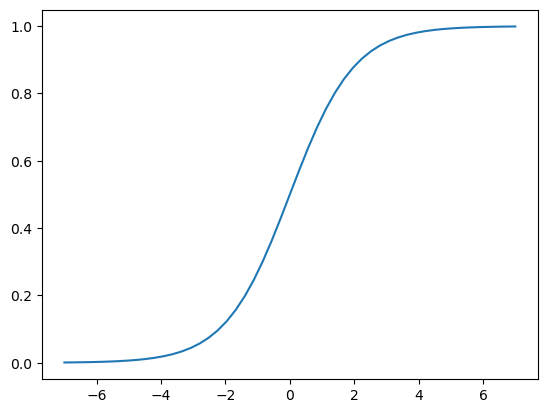

In [569]:
plt.plot(z, sigmoid(z))

In [570]:
def log_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + w[j]* xi[j]

    result = sigmoid(score)
    return result

# Training Logistic Regression with Scikit Learn

In [571]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\SANDY\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [572]:
model.intercept_[0]

-0.1331236746334405

In [573]:
model.coef_[0].round(3)

array([ 0.542, -0.208, -0.466, -0.054, -0.078,  0.031, -0.115, -0.047,
        0.028, -0.159, -0.311,  0.294, -0.115,  0.003, -0.216,  0.118,
       -0.034,  0.085, -0.115, -0.101,  0.236, -0.115, -0.252, -0.238,
        0.106, -0.108, -0.023, -0.114, -0.181,  0.255, -0.091,  0.118,
       -0.25 ,  0.175, -0.157, -0.115,  0.14 , -0.072, -0.115,  0.055,
        0.199, -0.115, -0.216, -0.057,  0.   ])

In [574]:
# Hard Prediction
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [575]:
# Soft Prediction
model.predict_proba(X_train)[:,1]

array([0.16593781, 0.13061268, 0.18928583, ..., 0.27801235, 0.01219617,
       0.08181506])

In [576]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.15045215, 0.24417446, 0.40883495, ..., 0.71757086, 0.05898495,
       0.03281314])

In [577]:
churn_decision = (y_pred >= 0.5)

In [578]:
y_val

array([0, 0, 1, ..., 1, 0, 0])

In [579]:
churn_decision.astype(int)

array([0, 0, 0, ..., 1, 0, 0])

In [580]:
(y_val == churn_decision).mean()

0.8019872249822569

In [581]:
df_val[churn_decision].customerid

3       0337-cnpze
10      2038-oeqzh
11      9846-gkxas
12      8051-hjrlt
13      8990-zxlsu
           ...    
1395    2809-zmyoq
1396    3536-iqctx
1400    5196-sgoak
1401    3050-gbush
1406    1031-iideo
Name: customerid, Length: 300, dtype: object

In [582]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [583]:
df_pred

,probability,prediction,actual
0,0.150452,0,0
1,0.244174,0,0
2,0.408835,0,1
3,0.560344,1,1
4,0.050287,0,0
...,...,...,...
1404,0.067693,0,1
1405,0.310604,0,0
1406,0.717571,1,1
1407,0.058985,0,0


In [584]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [585]:
df_pred

,probability,prediction,actual,correct
0,0.150452,0,0,True
1,0.244174,0,0,True
2,0.408835,0,1,False
3,0.560344,1,1,True
4,0.050287,0,0,True
...,...,...,...,...
1404,0.067693,0,1,False
1405,0.310604,0,0,True
1406,0.717571,1,1,True
1407,0.058985,0,0,True


In [586]:
df_pred.correct.mean()

0.8019872249822569

# Model Interpretation

In [587]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [588]:
model.coef_[0].round(3)

array([ 0.542, -0.208, -0.466, -0.054, -0.078,  0.031, -0.115, -0.047,
        0.028, -0.159, -0.311,  0.294, -0.115,  0.003, -0.216,  0.118,
       -0.034,  0.085, -0.115, -0.101,  0.236, -0.115, -0.252, -0.238,
        0.106, -0.108, -0.023, -0.114, -0.181,  0.255, -0.091,  0.118,
       -0.25 ,  0.175, -0.157, -0.115,  0.14 , -0.072, -0.115,  0.055,
        0.199, -0.115, -0.216, -0.057,  0.   ])

In [589]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.542,
 'contract=one_year': -0.208,
 'contract=two_year': -0.466,
 'dependents=no': -0.054,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.031,
 'deviceprotection=no_internet_service': -0.115,
 'deviceprotection=yes': -0.047,
 'gender=female': 0.028,
 'gender=male': -0.159,
 'internetservice=dsl': -0.311,
 'internetservice=fiber_optic': 0.294,
 'internetservice=no': -0.115,
 'monthlycharges': 0.003,
 'multiplelines=no': -0.216,
 'multiplelines=no_phone_service': 0.118,
 'multiplelines=yes': -0.034,
 'onlinebackup=no': 0.085,
 'onlinebackup=no_internet_service': -0.115,
 'onlinebackup=yes': -0.101,
 'onlinesecurity=no': 0.236,
 'onlinesecurity=no_internet_service': -0.115,
 'onlinesecurity=yes': -0.252,
 'paperlessbilling=no': -0.238,
 'paperlessbilling=yes': 0.106,
 'partner=no': -0.108,
 'partner=yes': -0.023,
 'paymentmethod=bank_transfer_(automatic)': -0.114,
 'paymentmethod=credit_card_(automatic)': -0.181,
 'paymentmethod=electronic_check': 0.255

In [590]:
small = ['contract' , 'tenure', 'monthlycharges']

In [591]:
dicts_train_small = df_train[small].to_dict(orient = 'records')
dicts_val_small = df_val[small].to_dict(orient = 'records')

In [592]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [593]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [594]:
X_train_small = dv_small.transform(dicts_train_small)

In [595]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [596]:
w0 = model_small.intercept_[0]
w0.round(3)

-2.566

In [597]:
w = model_small.coef_[0]
w.round(3)

array([ 1.067, -0.026, -1.032,  0.027, -0.036])

In [598]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 1.067,
 'contract=one_year': -0.026,
 'contract=two_year': -1.032,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [599]:
score = -2.566 + 1.067 + 50* (0.027) + 5 * (-0.036)
score

-0.3289999999999998

In [600]:
sigmoid(score)

0.41848395843712505

# Using the Model

In [601]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient = 'records')

In [602]:
dv = DictVectorizer(sparse=False)

In [603]:
X_full_train = dv.fit_transform(dicts_full_train)

In [604]:
y_full_train = df_full_train.churn.values

In [605]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

c:\Users\SANDY\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [606]:
dicts_test = df_test[categorical + numerical].to_dict(orient = 'records')

In [607]:
X_test = dv.transform(dicts_test)

In [608]:
y_pred = model.predict_proba(X_test)[:, 1]

In [609]:
churn_decision = (y_pred >= 0.5)

In [610]:
(churn_decision == y_test).mean()

0.8204400283889283

In [631]:
customer = dicts_test[0]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'no',
 'multiplelines': 'no_phone_service',
 'internetservice': 'dsl',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 1,
 'monthlycharges': 24.8,
 'totalcharges': 24.8}

In [632]:
X_small = dv.transform(customer)

In [633]:
X_small.shape

(1, 45)

In [634]:
model.predict_proba(X_small)[0, 1]

0.6942250605824171

In [635]:
y_test[0]

1